In **Transformers**, **positional encoding** is used to inject information about the position of tokens in a sequence, since the self-attention mechanism is invariant to the order of tokens. The Transformer model typically uses **sinusoidal positional encodings** (as introduced in the original Transformer paper "Attention is All You Need"), but you can also learn the positional encoding.

Here, I'll provide Python code to **implement positional encoding** using the **sinusoidal method**, as it's widely used in many Transformer-based models like **BERT**, **GPT**, etc.

![](https://upload.wikimedia.org/wikipedia/commons/1/1f/One_positive_frequency_component%2C_cosine_and_sine%2C_from_rotating_vector_%28fast_animation%29.gif)

### **Sinusoidal Positional Encoding Formula**

The positional encoding $PE$ for each position $pos$ and each dimension $i$ in the encoding vector is defined as follows:

- For even indices (i.e., $i$ is even):  
  $$
  PE(pos, 2i) = \sin\left(\frac{pos}{10000^{\frac{2i}{d}}}\right)
  $$
  
- For odd indices (i.e., $(i)$ is odd):  
$$
PE(pos, 2i+1) = \cos\left(\frac{pos}{10000^{\frac{2i}{d}}}\right)
$$

Where:
- $pos$ is the position of the token in the sequence.
- $i$ is the dimension index.
- $d$ is the embedding dimension.


### Key Points:
- **Sinusoidal functions** ensure that each position is represented uniquely, with a continuous and smooth transition between positions.
- **Exponentiation of 10000** adjusts the scaling of the sinusoidal functions for different dimensions.

These formulas are used to generate the **Positional Encoding** for each token in the sequence, which is then added to the input embeddings.

(20, 20)


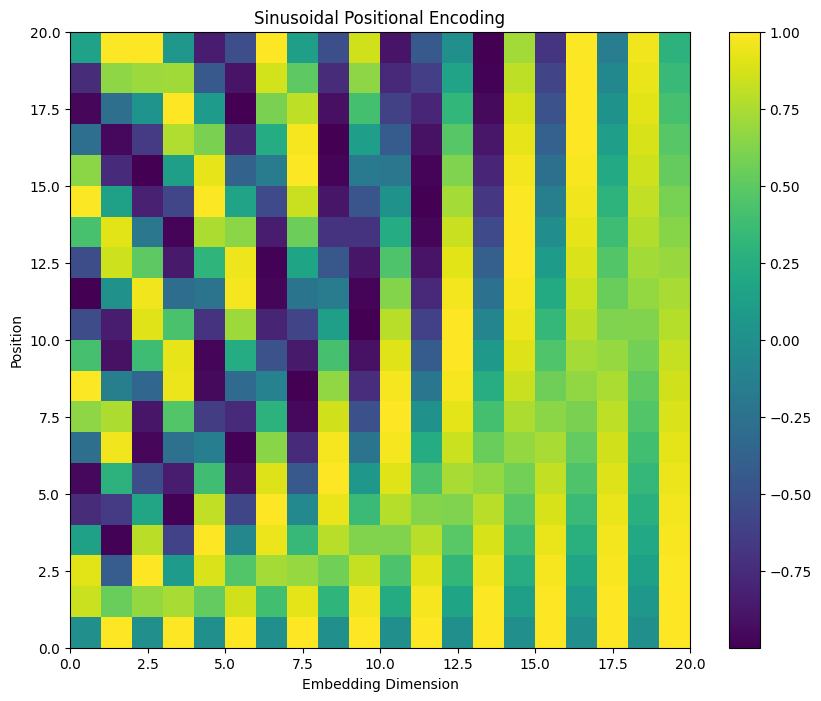

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
pd.options.display.float_format = "{:04.5f}".format


def get_positional_encoding(seq_len, d_model):
    """
    Generate the sinusoidal positional encoding for a given sequence length and model dimension.
    
    Args:
    - seq_len (int): The length of the input sequence.
    - d_model (int): The dimension of the positional encoding vector (usually the same as the model embedding dimension).
    
    Returns:
    - pos_encoding (numpy.ndarray): The generated positional encoding matrix of shape (seq_len, d_model).
    """
    # Create a matrix of shape (seq_len, d_model)
    pos_encoding = np.zeros((seq_len, d_model))

    # Position values (0 to seq_len-1)
    positions = np.arange(seq_len)[:, np.newaxis]  # Shape (seq_len, 1)

    # Dimensions (0 to d_model-1)
    dimensions = np.arange(d_model)[np.newaxis, :]  # Shape (1, d_model)

    # Calculate the positional encoding using the sinusoidal formula
    pos_encoding[:, 0::2] = np.sin(positions / (min(d_model, 10000) ** (2 * (dimensions[:, 0::2] // 2) / d_model)))
    pos_encoding[:, 1::2] = np.cos(positions / (min(d_model, 10000) ** (2 * (dimensions[:, 1::2] // 2) / d_model)))

    return pos_encoding

# Example parameters

seq_len = 20   # Length of the input sequence (number of tokens)
d_model = 20  # Dimension of the embedding (the model's hidden size)


# Generate the positional encoding matrix
pos_encoding = get_positional_encoding(seq_len, d_model)
print(pos_encoding.shape)

# Print the positional encoding
#print("Positional Encoding Matrix:\n", pd.DataFrame(pos_encoding))

# Optionally, plot the positional encoding for visualization
plt.figure(figsize=(10, 8))
plt.pcolormesh(pos_encoding, cmap='viridis')
plt.xlabel('Embedding Dimension')
plt.ylabel('Position')
plt.title('Sinusoidal Positional Encoding')
plt.colorbar()
plt.show()
